In [41]:
import quandl
import pandas as pd
%matplotlib inline

In [94]:
mydata = quandl.get("FRED/GDP", start_date="2001-12-31")#, end_date="2005-12-31")


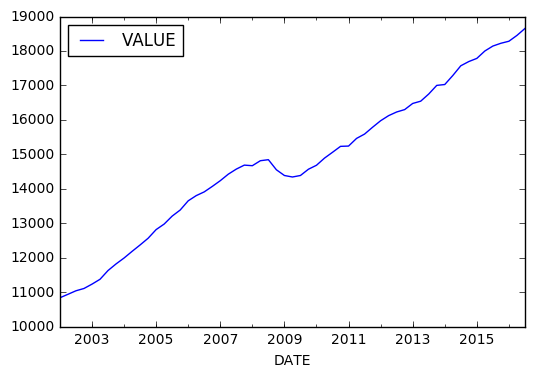

In [95]:
mydata.plot()

In [12]:
mydata1 = quandl.get("GOOG/NASDAQ_GOOGL", collapse="daily")

In [18]:
mydata1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,50.06,52.08,48.03,50.22,22353092.0
2004-08-20,50.79,54.59,50.30,54.21,11429498.0
2004-08-23,55.44,56.80,54.58,54.75,9140244.0
2004-08-24,55.68,55.86,51.84,52.49,7632224.0
2004-08-25,52.53,54.05,51.99,53.05,4599110.0


In [105]:
datamonth = mydata1['2016-11-1':]['Open']
data = datamonth.reset_index()
date = data['Date'].astype(str)
x = date.apply(lambda x: x.split('-'))[:]
#pd.DataFrame([i for i in x])
day = []
dates = [int(y[2]) for i,y in enumerate(x)]
dates = pd.DataFrame(dates)

In [163]:
#mydata1.reset_index(inplace=True)
data2 = pd.concat((pd.DataFrame(datamonth).reset_index(), dates),axis=1)
data2.columns = ['Date', 'Open', 'Day']
x, y = data2['Day'], data2['Open']

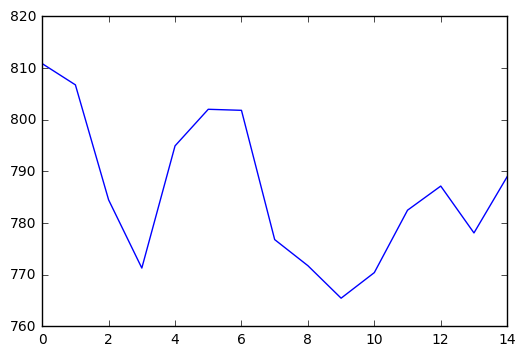

In [165]:
data2['Open'].plot()

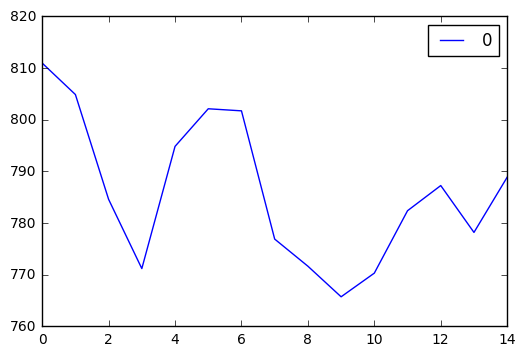

In [167]:
from sklearn.svm import SVC,SVR

sv = SVR(kernel='rbf', C=1e3, gamma=0.1)
sv.fit(x.values.reshape(-1,1),y)

pred = sv.predict(x.values.reshape(-1,1))
pd.DataFrame(pred).plot()

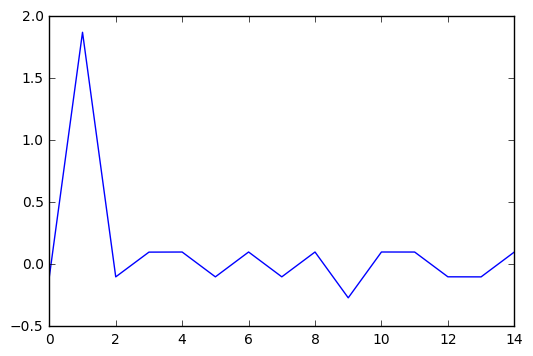